# Twende

In [60]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow import keras
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

In [58]:
data_frame= pd.read_csv('data_frame/data.csv')
data_frame=data_frame.drop(index=data_frame.index[-1])

In [62]:
data_frame['Event name'] = pd.factorize(data_frame['Event name'])[0]
data_frame['Location'] = pd.factorize(data_frame['Location'])[0]

,Event name,Location,Venue cost,Number of Facilitators,Equipments Cost,Food and Beverage Cost,Accommodations Cost,Marketing and Advertising Cost,Duration(days),Transportation&Communication Cost,Guest of honor Cost,Staff&Volunteer Expenses,Insurance Cost,Miscellaneous Expenses,Estimated Cost ($)
0,0,0,5500000,3,1800000,1080000,450000,4500000,6,1070000,150000,250000,250000,4500000,17920000
1,1,1,2800000,4,2800000,1680000,840000,3000000,7,1000000,0,150000,50000,300000,9680000
2,2,1,1800000,2,900000,120000,120000,2500000,1,2300000,0,550000,250000,200000,11540000
3,3,2,4500000,3,3500000,360000,180000,5000000,3,600000,150000,500000,450000,1000000,18990000
4,2,3,2000000,5,1000000,3300000,1650000,2500000,8,2450000,100000,350000,200000,3000000,14450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2,1,2100000,5,2200000,3000000,1500000,2500000,10,2900000,75000,550000,300000,750000,19810000
495,12,10,9000000,10,2000000,3840000,1920000,1500000,8,800000,180000,700000,400000,2310000,19640000
496,8,8,1400000,2,1000000,240000,60000,2000000,1,2300000,150000,500000,200000,350000,10265000
497,0,4,2500000,11,1400000,7800000,4050000,2400000,11,920000,150000,450000,250000,5000000,22590000


In [63]:
data_frame.sum()

Event name                                 2804
Location                                   3224
Venue cost                           1353300000
Number of Facilitators                     2651
Equipments Cost                       568050000
Food and Beverage Cost               1174600000
Accommodations Cost                   627940000
Marketing and Advertising Cost       1606300000
Duration(days)                             3437
Transportation&Communication Cost     865840000
Guest of honor Cost                    60310000
Staff&Volunteer Expenses              183400000
Insurance Cost                        100220000
Miscellaneous Expenses                973120000
Estimated Cost ($)                   7353990000
dtype: int64

In [64]:
data_frame.tail()

,Event name,Location,Venue cost,Number of Facilitators,Equipments Cost,Food and Beverage Cost,Accommodations Cost,Marketing and Advertising Cost,Duration(days),Transportation&Communication Cost,Guest of honor Cost,Staff&Volunteer Expenses,Insurance Cost,Miscellaneous Expenses,Estimated Cost ($)
494,2,1,2100000,5,2200000,3000000,1500000,2500000,10,2900000,75000,550000,300000,750000,19810000
495,12,10,9000000,10,2000000,3840000,1920000,1500000,8,800000,180000,700000,400000,2310000,19640000
496,8,8,1400000,2,1000000,240000,60000,2000000,1,2300000,150000,500000,200000,350000,10265000
497,0,4,2500000,11,1400000,7800000,4050000,2400000,11,920000,150000,450000,250000,5000000,22590000
498,6,8,3000000,10,1000000,3780000,1800000,4000000,7,2000000,0,200000,250000,4000000,16310000


In [65]:
data_frame.describe()

,Event name,Location,Venue cost,Number of Facilitators,Equipments Cost,Food and Beverage Cost,Accommodations Cost,Marketing and Advertising Cost,Duration(days),Transportation&Communication Cost,Guest of honor Cost,Staff&Volunteer Expenses,Insurance Cost,Miscellaneous Expenses,Estimated Cost ($)
count,499.000000,499.000000,4.990000e+02,499.000000,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,499.000000,4.990000e+02,499.000000,499.000000,499.000000,4.990000e+02,4.990000e+02
mean,5.619238,6.460922,2.712024e+06,5.312625,1.138377e+06,2.353908e+06,1.258397e+06,3.219038e+06,6.887776,1.735150e+06,120861.723447,367535.070140,200841.683367,1.950140e+06,1.473745e+07
std,4.176251,4.610967,1.774104e+06,2.750404,5.910181e+05,2.003578e+06,1.074392e+06,1.705607e+06,3.808075,1.151368e+06,107490.351289,192066.902544,111993.585704,1.552952e+06,6.551600e+06
min,0.000000,0.000000,2.000000e+05,1.000000,3.000000e+05,1.200000e+05,6.000000e+04,5.000000e+05,1.000000,1.500000e+05,0.000000,50000.000000,50000.000000,8.000000e+04,3.110000e+06
25%,2.000000,3.000000,1.400000e+06,3.000000,7.000000e+05,8.400000e+05,4.200000e+05,2.000000e+06,4.000000,9.700000e+05,0.000000,150000.000000,100000.000000,5.000000e+05,9.680000e+06
50%,5.000000,5.000000,2.400000e+06,5.000000,1.000000e+06,1.680000e+06,9.800000e+05,2.600000e+06,6.000000,1.500000e+06,100000.000000,400000.000000,200000.000000,2.000000e+06,1.302000e+07
75%,8.000000,9.000000,3.500000e+06,7.000000,1.450000e+06,3.600000e+06,1.905000e+06,4.500000e+06,9.000000,2.400000e+06,200000.000000,500000.000000,250000.000000,3.000000e+06,1.865000e+07
max,18.000000,19.000000,9.000000e+06,12.000000,3.500000e+06,9.000000e+06,6.000000e+06,7.000000e+06,15.000000,5.500000e+06,400000.000000,750000.000000,500000.000000,6.000000e+06,3.410000e+07


# Scatter plot for estimated cost and Venue cost

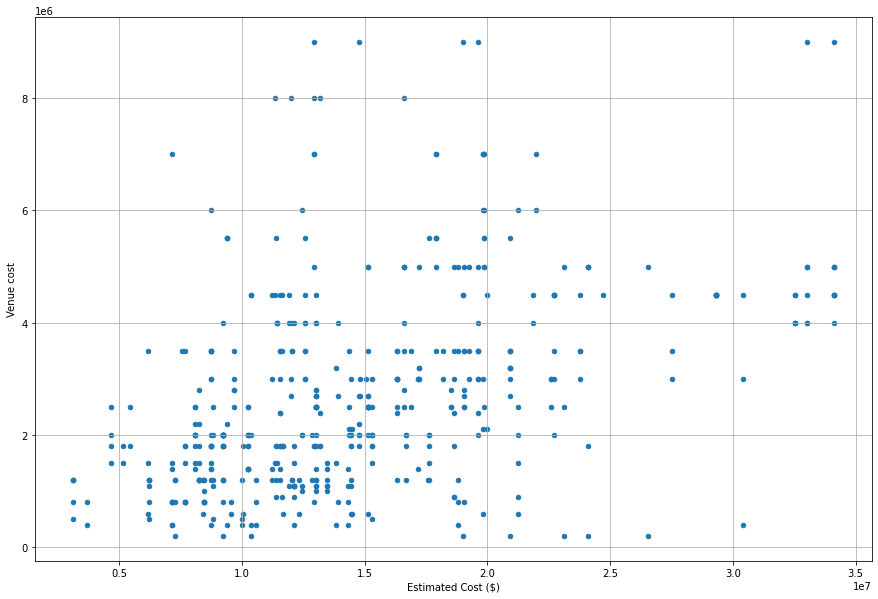

In [66]:
data_frame.plot(kind='scatter',figsize=(15,10),x="Estimated Cost ($)",y='Venue cost')
plt.grid()
plt.show()

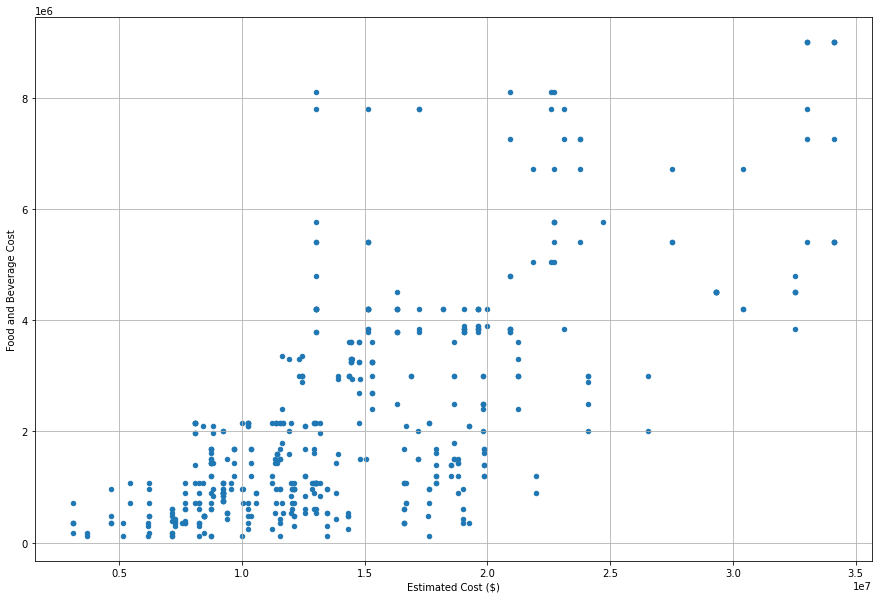

In [67]:
data_frame.plot(kind='scatter',figsize=(15,10),x="Estimated Cost ($)",y='Food and Beverage Cost')
plt.grid()
plt.show()

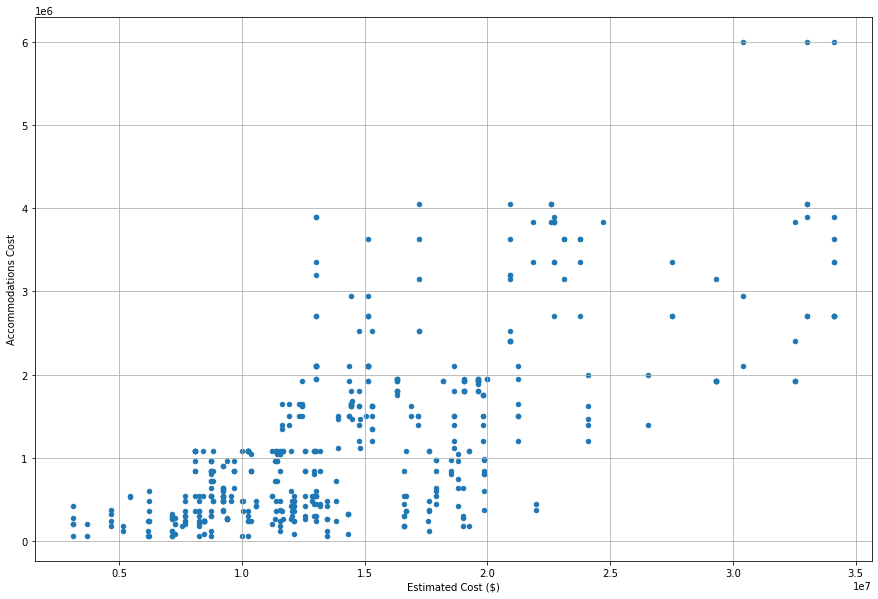

In [68]:
data_frame.plot(kind='scatter',figsize=(15,10),x="Estimated Cost ($)",y='Accommodations Cost')
plt.grid()
plt.show()

# Training model

In [72]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# Define hyperparameters
input_dim = 14  # number of input variables
output_dim = 1  # number of output variables
hidden_dim = 30  # number of neurons in the hidden layer
num_epochs = 50  # number of epochs to train the model
batch_size = 100  # size of batch for each epoch
learning_rate = 0.01  # learning rate for the optimizer


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

# Split the data into input (X) and output (y) variables
X = data_frame.drop(columns='Estimated Cost ($)')
y = data_frame['Estimated Cost ($)']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
X_test.shape

(100, 14)

In [77]:
# Create the model architecture
model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
# Compile the model
model.compile(loss='mape', optimizer=Adam(lr=learning_rate), metrics=['mape'])

# Train the model on the training data
history = model.fit(X_train, y_train,epochs=num_epochs,batch_size=batch_size, validation_data=(X_val, y_val))


Epoch 1/50


/home/ombeni/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 83ms/step - loss: 94.8732 - mape: 94.8732 - val_loss: 79.9152 - val_mape: 79.9152
Epoch 2/50
4/4 [==============================] - 0s 24ms/step - loss: 71.2908 - mape: 71.2908 - val_loss: 40.0486 - val_mape: 40.0486
Epoch 3/50
4/4 [==============================] - 0s 18ms/step - loss: 35.6595 - mape: 35.6595 - val_loss: 42.9094 - val_mape: 42.9094
Epoch 4/50
4/4 [==============================] - 0s 22ms/step - loss: 44.1597 - mape: 44.1597 - val_loss: 30.8807 - val_mape: 30.8807
Epoch 5/50
4/4 [==============================] - 0s 19ms/step - loss: 32.2645 - mape: 32.2645 - val_loss: 29.8069 - val_mape: 29.8069
Epoch 6/50
4/4 [==============================] - 0s 18ms/step - loss: 34.8705 - mape: 34.8705 - val_loss: 31.9684 - val_mape: 31.9684
Epoch 7/50
4/4 [==============================] - 0s 15ms/step - loss: 32.4537 - mape: 32.4537 - val_loss: 23.9511 - val_mape: 23.9511
Epoch 8/50
4/4 [==============================] - 0s 17ms/step - l

# Model predication

In [78]:
#predict values using the trained model
predictions = model.predict(X_test)

# Predicted value against real value

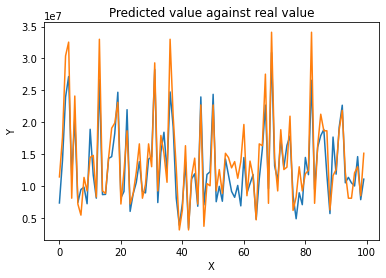

In [79]:
# create the plot

y_test=np.array(y_test)
plt.plot(predictions)
plt.plot(y_test)

# set the axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Predicted value against real value')
# display the plot
plt.show()

In [80]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 18.02655601501465
Validation accuracy: 18.02655601501465


In [81]:
X_test=X_test.head()

In [82]:
predictions = model.predict(X_test)
predictions

array([[ 7335978.],
       [14035865.],
       [23930072.],
       [27156818.],
       [11647316.]], dtype=float32)

In [83]:
y_test

array([11420000, 17640000, 30400000, 32550000,  8080000, 24100000,
        7170000,  5430000, 11340000,  9225000, 14470000, 14800000,
        8270000, 33000000,  9225000,  8840000, 14450000, 19060000,
       19865000, 23120000,  7170000, 12330000, 18650000,  7170000,
        8840000, 12145000, 16600000,  8080000, 10265000, 16600000,
       13020000, 29300000,  9225000, 17920000, 15125000, 10580000,
       33000000, 20940000, 12840000,  3110000,  6240000, 16310000,
        3110000, 11540000, 14360000,  7160000, 22700000,  3680000,
       10370000, 10030000, 22700000,  9225000, 12570000,  8840000,
       15125000, 14450000, 12840000, 13820000, 11210000, 13820000,
       19640000,  8470000, 13900000, 11540000,  4690000, 16600000,
       16310000, 27530000,  7280000, 34100000, 14330000,  9225000,
       18820000, 12570000, 12950000, 20940000,  6170000,  8270000,
       13010000,  9225000, 11910000, 12450000, 34100000,  7280000,
       16310000, 21250000, 18650000, 18650000,  6240000, 11630

In [84]:
model.save('Twende')

INFO:tensorflow:Assets written to: Twende/assets


In [87]:
loaded_model = tf.keras.models.load_model('Twende/assets')

# make predictions on new data
predict = loaded_model.predict(X_test)
predict

array([[ 7335978.],
       [14035865.],
       [23930072.],
       [27156818.],
       [11647316.]], dtype=float32)